In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns


In [39]:
sales = pd.read_csv("sales_data.csv")
products = pd.read_csv("product_info.csv")
customers = pd.read_csv("customer_info.csv")

sales.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20


In [40]:
sales.info()
products.info()
customers.info()

sales.isnull().sum(), products.isnull().sum(), customers.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     objec

(order_id              1
 customer_id           2
 product_id            5
 quantity              3
 unit_price            1
 order_date            2
 delivery_status       3
 payment_method        3
 region                0
 discount_applied    517
 dtype: int64,
 product_id       0
 product_name     0
 category         0
 launch_date      0
 base_price       0
 supplier_code    0
 dtype: int64,
 customer_id     3
 email           6
 signup_date     4
 gender          4
 region          3
 loyalty_tier    2
 dtype: int64)

In [41]:
# Dates
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce")
products["launch_date"] = pd.to_datetime(products["launch_date"], errors="coerce")
customers["signup_date"] = pd.to_datetime(customers["signup_date"], errors="coerce")

# Text cleanup
for col in ["delivery_status", "payment_method", "region"]:
    sales[col] = sales[col].astype(str).str.strip().str.title().replace({"Nan": np.nan})

for col in ["category", "supplier_code", "product_name"]:
    products[col] = products[col].astype(str).str.strip()
products["category"] = products["category"].str.title()
products["supplier_code"] = products["supplier_code"].str.upper()

for col in ["gender", "region", "loyalty_tier"]:
    customers[col] = customers[col].astype(str).str.strip().str.title().replace({"Nan": np.nan})

# Numeric cleanup
for col in ["quantity", "unit_price", "discount_applied"]:
    sales[col] = pd.to_numeric(sales[col], errors="coerce")

# Fill missing values (keep it simple)
sales["discount_applied"] = sales["discount_applied"].fillna(0)
sales["region"] = sales["region"].fillna("Unknown")
sales["delivery_status"] = sales["delivery_status"].fillna("Unknown")
sales["payment_method"] = sales["payment_method"].fillna("Unknown")

products["category"] = products["category"].fillna("Unknown")

customers["region"] = customers["region"].fillna("Unknown")
customers["gender"] = customers["gender"].fillna("Unknown")
customers["loyalty_tier"] = customers["loyalty_tier"].fillna("Unknown")
customers["email"] = customers["email"].fillna("Missing")

# Remove duplicates + keep counts for your report
sales_before = len(sales); sales = sales.drop_duplicates(subset=["order_id"]); sales_dupes = sales_before - len(sales)
prod_before = len(products); products = products.drop_duplicates(subset=["product_id"]); prod_dupes = prod_before - len(products)
cust_before = len(customers); customers = customers.drop_duplicates(subset=["customer_id"]); cust_dupes = cust_before - len(customers)

sales_dupes, prod_dupes, cust_dupes


C:\Users\khali\AppData\Local\Temp\ipykernel_23852\113633198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  products["launch_date"] = pd.to_datetime(products["launch_date"], errors="coerce")
C:\Users\khali\AppData\Local\Temp\ipykernel_23852\113633198.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers["signup_date"] = pd.to_datetime(customers["signup_date"], errors="coerce")


(2, 0, 2)

In [42]:
merged = sales.merge(products, on="product_id", how="left")
merged = merged.merge(customers, on="customer_id", how="left")

merged.info()
merged.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2997 non-null   object        
 1   customer_id       2996 non-null   object        
 2   product_id        2993 non-null   object        
 3   quantity          2993 non-null   float64       
 4   unit_price        2997 non-null   float64       
 5   order_date        1180 non-null   datetime64[ns]
 6   delivery_status   2998 non-null   object        
 7   payment_method    2998 non-null   object        
 8   region_x          2998 non-null   object        
 9   discount_applied  2998 non-null   float64       
 10  product_name      2993 non-null   object        
 11  category          2993 non-null   object        
 12  launch_date       2993 non-null   datetime64[ns]
 13  base_price        2993 non-null   float64       
 14  supplier_code     2993 n

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Femle,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


In [43]:
merged["revenue"] = merged["quantity"] * merged["unit_price"] * (1 - merged["discount_applied"])
merged["order_week"] = merged["order_date"].dt.isocalendar().week

merged["price_band"] = pd.cut(
    merged["unit_price"],
    bins=[-np.inf, 15, 30, np.inf],
    labels=["Low", "Medium", "High"]
)

merged["days_to_order"] = (merged["order_date"] - merged["launch_date"]).dt.days
merged["email_domain"] = merged["email"].astype(str).str.split("@").str[-1].str.lower()
merged["is_late"] = merged["delivery_status"].eq("Delayed")
merged["signup_month"] = merged["signup_date"].dt.to_period("M").astype(str)

In [44]:
# Ensure unit_price is numeric
merged["unit_price"] = pd.to_numeric(merged["unit_price"], errors="coerce")

# Clean region_x
merged["region_x"] = (
    merged["region_x"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({"Nan": np.nan, "None": np.nan, "": np.nan})
    .fillna("Unknown")
)

# Recreate price_band
merged["price_band"] = pd.cut(
    merged["unit_price"],
    bins=[-np.inf, 15, 30, np.inf],
    labels=["Low", "Medium", "High"]
)

# Label missing price bands
merged["price_band"] = merged["price_band"].cat.add_categories(["Unknown"]).fillna("Unknown")

# Delivery performance summary
delivery_perf = merged.groupby(
    ["region_x", "price_band"],
    as_index=False,
    observed=True
).agg(
    orders=("order_id", "nunique"),
    late_rate=("is_late", "mean")
)

delivery_perf = delivery_perf.sort_values(["region_x", "price_band"]).reset_index(drop=True)

delivery_perf.head()


,region_x,price_band,orders,late_rate
0,Central,Low,113,0.380531
1,Central,Medium,225,0.391111
2,Central,High,265,0.392453
3,East,Low,96,0.416667
4,East,Medium,238,0.424370


In [45]:
# Clean loyalty_tier typos
merged["loyalty_tier"] = (
    merged["loyalty_tier"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({
        "Brnze": "Bronze",
        "Bronze ": "Bronze",
        "Gld": "Gold",
        "Gold ": "Gold",
        "Slver": "Silver",
        "None": "Unknown",
        "Nan": "Unknown"
    })
)

# Quick check
merged["loyalty_tier"].value_counts()




loyalty_tier
Gold       1677
Silver      654
Bronze      628
Unknown      33
Sllver        6
Name: count, dtype: int64

In [46]:
# Clean payment_method typos and inconsistencies
merged["payment_method"] = (
    merged["payment_method"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({
        "Banktransfer": "Bank Transfer",
        "Bank Tranfer": "Bank Transfer",
        "Banktransfer": "Bank Transfer",
        "Bank Transfr": "Bank Transfer",
        "Creditcard": "Credit Card",
        "Credit Card ": "Credit Card",
        "Paypal": "Paypal",
        "Pay Pal": "Paypal",
        "Nan": "Unknown",
        "None": "Unknown"
    })
)

# Quick sanity check
merged["payment_method"].value_counts()


payment_method
Credit Card      1453
Bank Transfer     780
Paypal            762
Unknown             3
Name: count, dtype: int64

In [47]:
payment_by_loyalty = merged.groupby(
    ["loyalty_tier", "payment_method"],
    as_index=False
).agg(
    orders=("order_id", "nunique")
).sort_values(["loyalty_tier", "orders"], ascending=[True, False])

payment_by_loyalty.head(10)


,loyalty_tier,payment_method,orders
1,Bronze,Credit Card,283
0,Bronze,Bank Transfer,180
2,Bronze,Paypal,164
4,Gold,Credit Card,841
5,Gold,Paypal,429
3,Gold,Bank Transfer,405
6,Gold,Unknown,2
8,Silver,Credit Card,300
7,Silver,Bank Transfer,191
9,Silver,Paypal,162


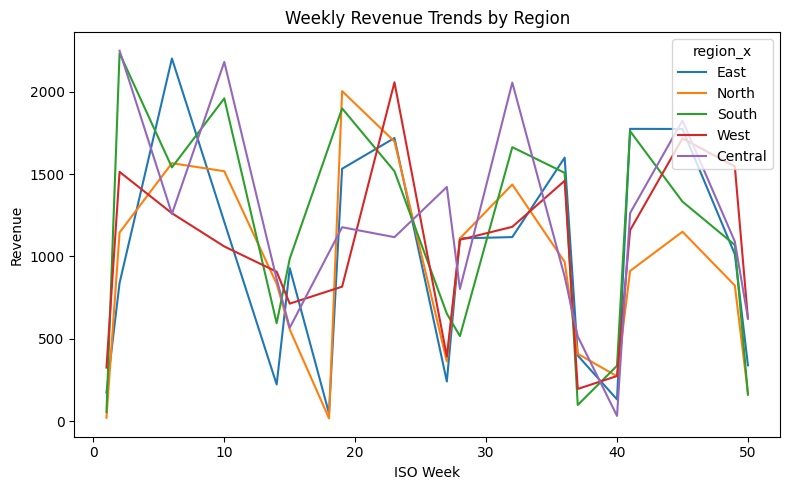

In [48]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=weekly_rev_region,
    x="order_week",
    y="revenue",
    hue="region_x"
)
plt.title("Weekly Revenue Trends by Region")
plt.xlabel("ISO Week")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

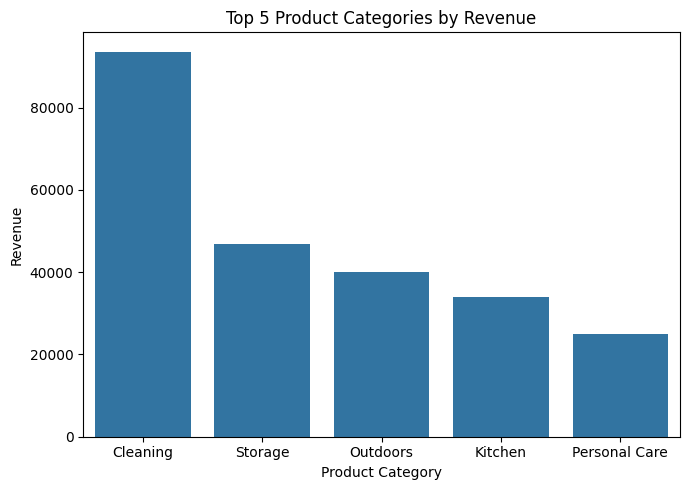

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=category_perf.head(5),
    x="category",
    y="revenue"
)
plt.title("Top 5 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

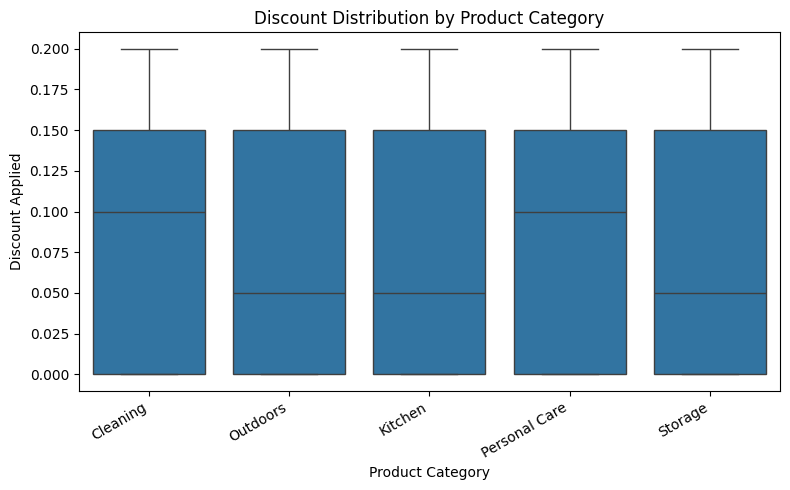

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged,
    x="category",
    y="discount_applied"
)
plt.title("Discount Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Discount Applied")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


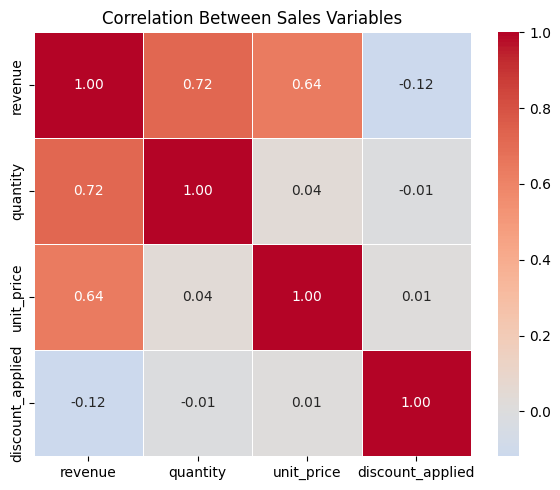

In [51]:
plt.figure(figsize=(6,5))

corr_matrix = merged[["revenue", "quantity", "unit_price", "discount_applied"]].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  
    center=0,
    linewidths=0.5
)

plt.title("Correlation Between Sales Variables")
plt.tight_layout()
plt.show()


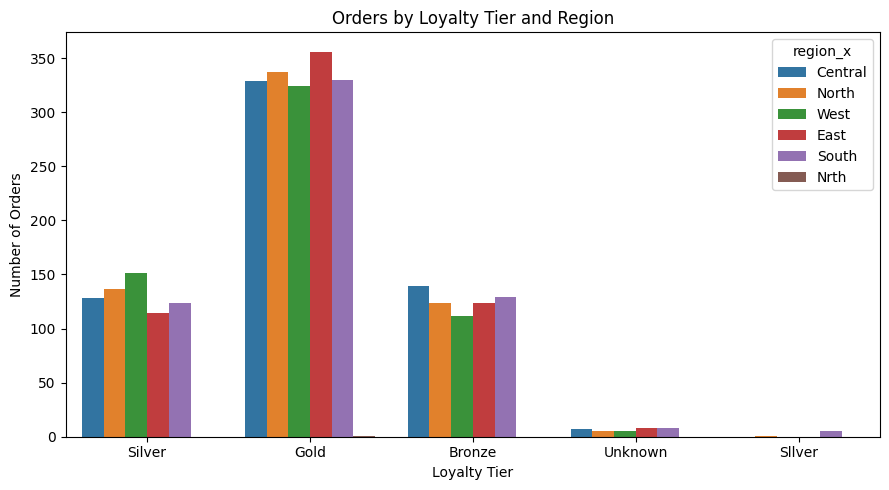

In [52]:
plt.figure(figsize=(9,5))

sns.countplot(
    data=merged,
    x="loyalty_tier",
    hue="region_x",
    dodge=True
)

plt.title("Orders by Loyalty Tier and Region")
plt.xlabel("Loyalty Tier")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


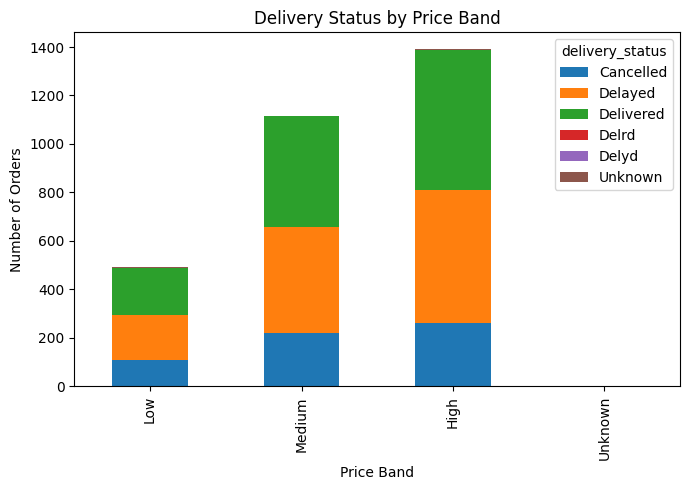

In [53]:
delivery_ct = pd.crosstab(
    merged["price_band"],
    merged["delivery_status"]
)

delivery_ct.plot(
    kind="bar",
    stacked=True,
    figsize=(7,5)
)

plt.title("Delivery Status by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()
